# Pytorch로 시작하는 딥러닝

## 인공 신경망 (Aritificail Neural Network)

### AND, OR, NAND 게이트 구현

In [1]:
def And_gate(x1,x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = w1*x1 + w2*x2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [4]:
def NAND_gate(x1,x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = w1*x1 + w2*x2 + b
    if result <= 0:
        return 0
    else :
        return 1

In [5]:
def OR_gate(x1,x2):
    w1 = 0.6
    w2 = 0.6
    b = 0.5
    result = w1*x1 + w2*x2 + b
    if result <= 0:
        return 0
    else :
        return 1

### 단층 퍼셉트론 구현하기

In [9]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda' :
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = torch.nn.Linear(2,1)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.7273974418640137
100 0.6951809525489807
200 0.693813681602478
300 0.6933774352073669
400 0.6932310461997986
500 0.6931794881820679
600 0.6931601762771606
700 0.6931526064872742
800 0.6931495070457458
900 0.6931481957435608
1000 0.6931476593017578
1100 0.6931474208831787
1200 0.6931473016738892
1300 0.6931473016738892
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471228599548
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200 

In [11]:
with torch.no_grad():
    hypothesis = model(X)
    prediction = (hypothesis > 0.5).float()
    accuracy = (prediction == Y).float().mean()
    
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', prediction.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


다층 퍼셉트론 구현하기

In [16]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
        nn.Linear(2,10,bias=True),
        nn.Sigmoid(),
        nn.Linear(10,10,bias=True),
        nn.Sigmoid(),
        nn.Linear(10,10,bias=True),
        nn.Sigmoid(),
        nn.Linear(10,1,bias=True),
        nn.Sigmoid()
        ).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

for epoch in range(10001):
    
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())        


0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931085586547852
2400 0.693105161190033
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.693041205406189
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928650140762329
4200 0.

In [18]:
with torch.no_grad():
    hypothesis = model(X)
    prediction = (hypothesis > 0.5).float()
    accuracy = (prediction == Y).float().mean()

    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', prediction.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())    

모델의 출력값(Hypothesis):  [[1.1168354e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8533420e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


### 다층 퍼셉트론으로 손글씨 분류하기

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [22]:
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [25]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


len(digits)으로 하면 안된다. 해당 데이터가 dictionary 형태로 이루어져있기 때문에 data의 길이가 아닌 dictionary의 길이가 나옴. 

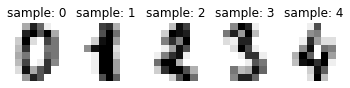

In [26]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [27]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [28]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [29]:
X = digits.data
Y = digits.target

In [30]:
import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 10)
        )

X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(100):
    
    optimizer.zero_grad()
    y_pred = model(X)

    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.381846
Epoch   10/100 Cost: 2.086940
Epoch   20/100 Cost: 1.844468
Epoch   30/100 Cost: 1.555474
Epoch   40/100 Cost: 1.246410
Epoch   50/100 Cost: 0.968091
Epoch   60/100 Cost: 0.724376
Epoch   70/100 Cost: 0.519714
Epoch   80/100 Cost: 0.380598
Epoch   90/100 Cost: 0.293385


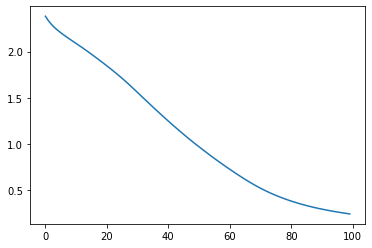

In [31]:
plt.plot(losses)

### MNIST 분류하기

In [69]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

In [99]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [100]:
mnist.data = np.array(mnist.data)
mnist.target = np.array(mnist.target.astype(np.int8))

In [101]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [102]:
X = mnist.data/255
y = mnist.target

In [103]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

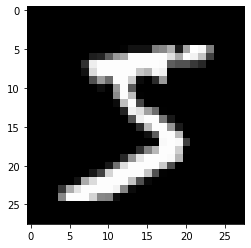

In [104]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [105]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

dataset_train = TensorDataset(X_train, y_train)
dataset_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(dataset_train, batch_size=64, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=64, shuffle=False)

In [106]:
import torch.nn as nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(784,100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [107]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [144]:
def train(epoch):
    
    model.train()

    for data, target in loader_train:
        target = torch.tensor(target, dtype=torch.long)
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, target)
        loss.backward()
        optimizer.step()

    print("epoch{}：완료".format(epoch))

In [126]:
def test():
    
    model.eval()
    correct = 0

    with torch.no_grad():
        for data, target in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(target.data.view_as(predicted)).sum()

    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [127]:
test()


테스트 데이터에서 예측 정확도: 1324/10000 (13%)



In [145]:
for epoch in range(3):
    train(epoch)

test()

C:\Users\DMQA\AppData\Local\Temp/ipykernel_11528/2902682684.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target, dtype=torch.long)


epoch0：완료
epoch1：완료
epoch2：완료

테스트 데이터에서 예측 정확도: 9583/10000 (96%)



예측 결과 : 2


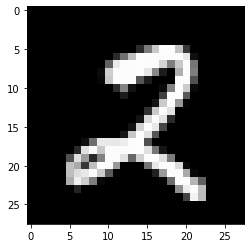

In [146]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print('예측 결과 : {}'.format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')

책의 일부분이 안맞아서 오류 수정에 약간 걸림돌이 있었음  

아래는 총 종합 버전 :)

In [ ]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.data = np.array(mnist.data)
mnist.target = np.array(mnist.target.astype(np.int8))

X = mnist.data/255
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

